# Task 2-I : Decision Tree I

# Pima indian diabetes analysis

**Note**
* [You can find this data & Information in kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1)
* class info :
    * 1 : tested positive for diabetes
    * 0 : tested negative for diabetes

In [106]:
###################
## Run this cell ##
###################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/pima_diabetes.csv'
db = pd.read_csv(data_path)
db.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q2. Split the db into training set & validation set & test set

1. x : all columns in db except 'Outcome'
2. y : the column 'Outcome' in db
3. variable names :
    * x_train, y_train
    * x_valid, y_valid
    * x_test, y_test
4. split data into training set and test set first
5. split training set into training set and validation set
6. train : valid : test = 7 : 2 : 1
5. randomstate : 2021
6. shuffle : True

In [107]:
####################
## your code here ##
####################
from sklearn.model_selection import train_test_split

x = db.drop(['Outcome'], axis=1)
y = db['Outcome']

x_train, x_test, y_train, y_test = train_test_split(db.drop(['Outcome'], axis=1), db['Outcome'],
                                                    test_size=0.1, random_state=2021 ,shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, 
                                                      test_size=2/9, random_state=2021,shuffle=True)

# Q3. Train 30 decision trees by increasing min_samples_leaf from 1 to 30 one by one

1. Put the trained trees into a list named 'trees'
    * Tree with smallest min_samples_leaf should be the first element of trees list
    * Tree with largest min_samples_leaf should be the last element of trees list

In [108]:
####################
## your code here ##
####################
from sklearn.tree import DecisionTreeClassifier
hyperparameter = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]      #조건1
trees = []

for alpha in hyperparameter:
  dt = DecisionTreeClassifier(min_samples_leaf=alpha)
  dt.fit(x_train, y_train)
  trees.append(dt)
print(trees)

[DecisionTreeClassifier(), DecisionTreeClassifier(min_samples_leaf=2), DecisionTreeClassifier(min_samples_leaf=3), DecisionTreeClassifier(min_samples_leaf=4), DecisionTreeClassifier(min_samples_leaf=5), DecisionTreeClassifier(min_samples_leaf=6), DecisionTreeClassifier(min_samples_leaf=7), DecisionTreeClassifier(min_samples_leaf=8), DecisionTreeClassifier(min_samples_leaf=9), DecisionTreeClassifier(min_samples_leaf=10), DecisionTreeClassifier(min_samples_leaf=11), DecisionTreeClassifier(min_samples_leaf=12), DecisionTreeClassifier(min_samples_leaf=13), DecisionTreeClassifier(min_samples_leaf=14), DecisionTreeClassifier(min_samples_leaf=15), DecisionTreeClassifier(min_samples_leaf=16), DecisionTreeClassifier(min_samples_leaf=17), DecisionTreeClassifier(min_samples_leaf=18), DecisionTreeClassifier(min_samples_leaf=19), DecisionTreeClassifier(min_samples_leaf=20), DecisionTreeClassifier(min_samples_leaf=21), DecisionTreeClassifier(min_samples_leaf=22), DecisionTreeClassifier(min_samples_l

# Q4. Evaluate all decision trees on the validation set
* Use accuracy ( unit should be % )
* Put the every accuracy into a list named accs_val
* Print every result.
    * Example
```
min_samples_leaf 1 : 30.01%
min_samples_leaf 2 : 35.45%
...
min_samples_leaf 30 : 61.85%
```

In [109]:
####################
## your code here ##
####################

accs_val = []

for alpha in hyperparameter:
  dt = DecisionTreeClassifier(min_samples_leaf=alpha)
  dt.fit(x_train, y_train)
  accs_val.append(dt.score(x_valid, y_valid))  #요청하신대로 accs_val에 정확도를 모두 담았습니다. 허나 example처럼 출력하는 과정에서는 accs_val을 사용하지 않았습니다.
  print("min_samples_leaf {:d} : {:.2f}%".format(alpha,100*dt.score(x_valid, y_valid)))

min_samples_leaf 1 : 66.88%
min_samples_leaf 2 : 68.18%
min_samples_leaf 3 : 67.53%
min_samples_leaf 4 : 69.48%
min_samples_leaf 5 : 71.43%
min_samples_leaf 6 : 72.73%
min_samples_leaf 7 : 74.68%
min_samples_leaf 8 : 74.68%
min_samples_leaf 9 : 77.27%
min_samples_leaf 10 : 76.62%
min_samples_leaf 11 : 76.62%
min_samples_leaf 12 : 75.32%
min_samples_leaf 13 : 76.62%
min_samples_leaf 14 : 77.27%
min_samples_leaf 15 : 78.57%
min_samples_leaf 16 : 78.57%
min_samples_leaf 17 : 78.57%
min_samples_leaf 18 : 78.57%
min_samples_leaf 19 : 78.57%
min_samples_leaf 20 : 79.22%
min_samples_leaf 21 : 79.22%
min_samples_leaf 22 : 77.27%
min_samples_leaf 23 : 77.92%
min_samples_leaf 24 : 77.92%
min_samples_leaf 25 : 77.27%
min_samples_leaf 26 : 77.27%
min_samples_leaf 27 : 74.03%
min_samples_leaf 28 : 74.03%
min_samples_leaf 29 : 74.03%
min_samples_leaf 30 : 74.03%


# Q5. Visualize the result of Q4

* Use line plot
    - x-axis : 1 ~ 30 ( min_samples_leaf which you used)
    - y-axis : accuracy 
& You can import more libraries you want

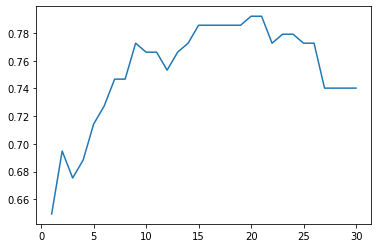

In [110]:
####################
## your code here ##
####################
import matplotlib.pyplot as plt
valid_score=[]

for alpha in hyperparameter:
  dt = DecisionTreeClassifier(min_samples_leaf=alpha)
  dt.fit(x_train, y_train)
  valid_score.append(dt.score(x_valid, y_valid))

plt.plot(hyperparameter, valid_score)
plt.show()

# Q6. Choose the model with the best performance on the validation set.

* Take the best tree out of the list(trees) and declare a variable with it
* The name of variable is best_tree
* Choose the best tree based on the results of Q4~Q5
* Choose the one with the highest min_samples_leaf, if there are multiple trees with the same top accuracy


In [111]:
####################
## your code here ##
####################

#정확도 약 79.22%로써 초모수 20,21 이 적절합니다

best_tree = DecisionTreeClassifier(min_samples_leaf=21)  #20으로 설정하여도 값은 동일합니다.
best_tree.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_valid = best_tree.predict(x_valid) 
print("검증데이터 정확도 {:.5f}%".format(accuracy_score(y_pred_valid , y_valid)))

검증데이터 정확도 0.79221%


# Q7. Quiz using classification report

* Show the classification report of best_tree on test set
* Answer the questions based on classification report
    * Q1 : What does recall for 'positive' class mean? 0.56
    * Q2 : What does recall for 'negative' class mean? 0.87

In [112]:
#######################################
## Run this cell & Write your answer ##
#######################################

from sklearn.metrics import classification_report
y_pred_test = best_tree.predict(x_test) 
print(classification_report(y_test, y_pred_test, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.74      0.87      0.80        45
    positive       0.75      0.56      0.64        32

    accuracy                           0.74        77
   macro avg       0.74      0.71      0.72        77
weighted avg       0.74      0.74      0.73        77



In [113]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred_test)
confusion

array([[39,  6],
       [14, 18]])

Q1, Q2의 보충설명입니다.

우선 77개의 테스트 샘플중에서 32개가 실제 positive 샘플입니다. 그럼 실제 32개의 positive 샘플중에서 positive라고 에측한 샘플은 18개입니다. 따라서 재현율은 18/32 = 0.56이 됩니다.

다음으로 77개의 테스트 샘플중에서 45개가 실제 negative 샘플입니다. 그럼 실제 45개의 negative 샘플중에서 negative라고 에측한 샘플은 39개입니다. 따라서 재현율은 39/45 = 0.87이 됩니다.

문제는 위 데이터는 당뇨병의 양성, 음성을 예측하여야 합니다. 실제 positive환자를 negative라고 예측을 하여서는 절대 안 됩니다.
 허나 positive 재현율은 0.56으로 매우 낮은 편에 속합니다. 약 당뇨병 양성환자 중 절반은 음성으로 분류해버리는 사태가 발생할수 있습니다.

따라서 <h3>**임계값을 설정하여 정밀도를 조금 줄이더라도 재현율을 높이는 방법을 선택하여야 합니다**.</h3>

# Q8. Visualize the feature importances using best_tree

* Use horizontal bar plot
    - x : names of features
    - height : feature importances
    - You can also try (vertical) bar plot
* You can import more libraries you want.

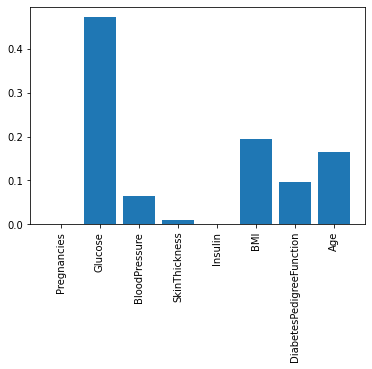

In [114]:
####################
## Your code here ##
####################

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(8)
category =  x_train.columns
interval = best_tree.feature_importances_
plt.xticks(x, category,rotation=90)
plt.bar(x, interval)

plt.show()

# Q9. Visualize the best_tree

1. Visualize the tree
    * fontsize : 15
    * filled : True
    * feature names & class names must be specified
2. Interpret the results
    * Use the three most important rules.
    * Interpretation using proportions of classes should be included

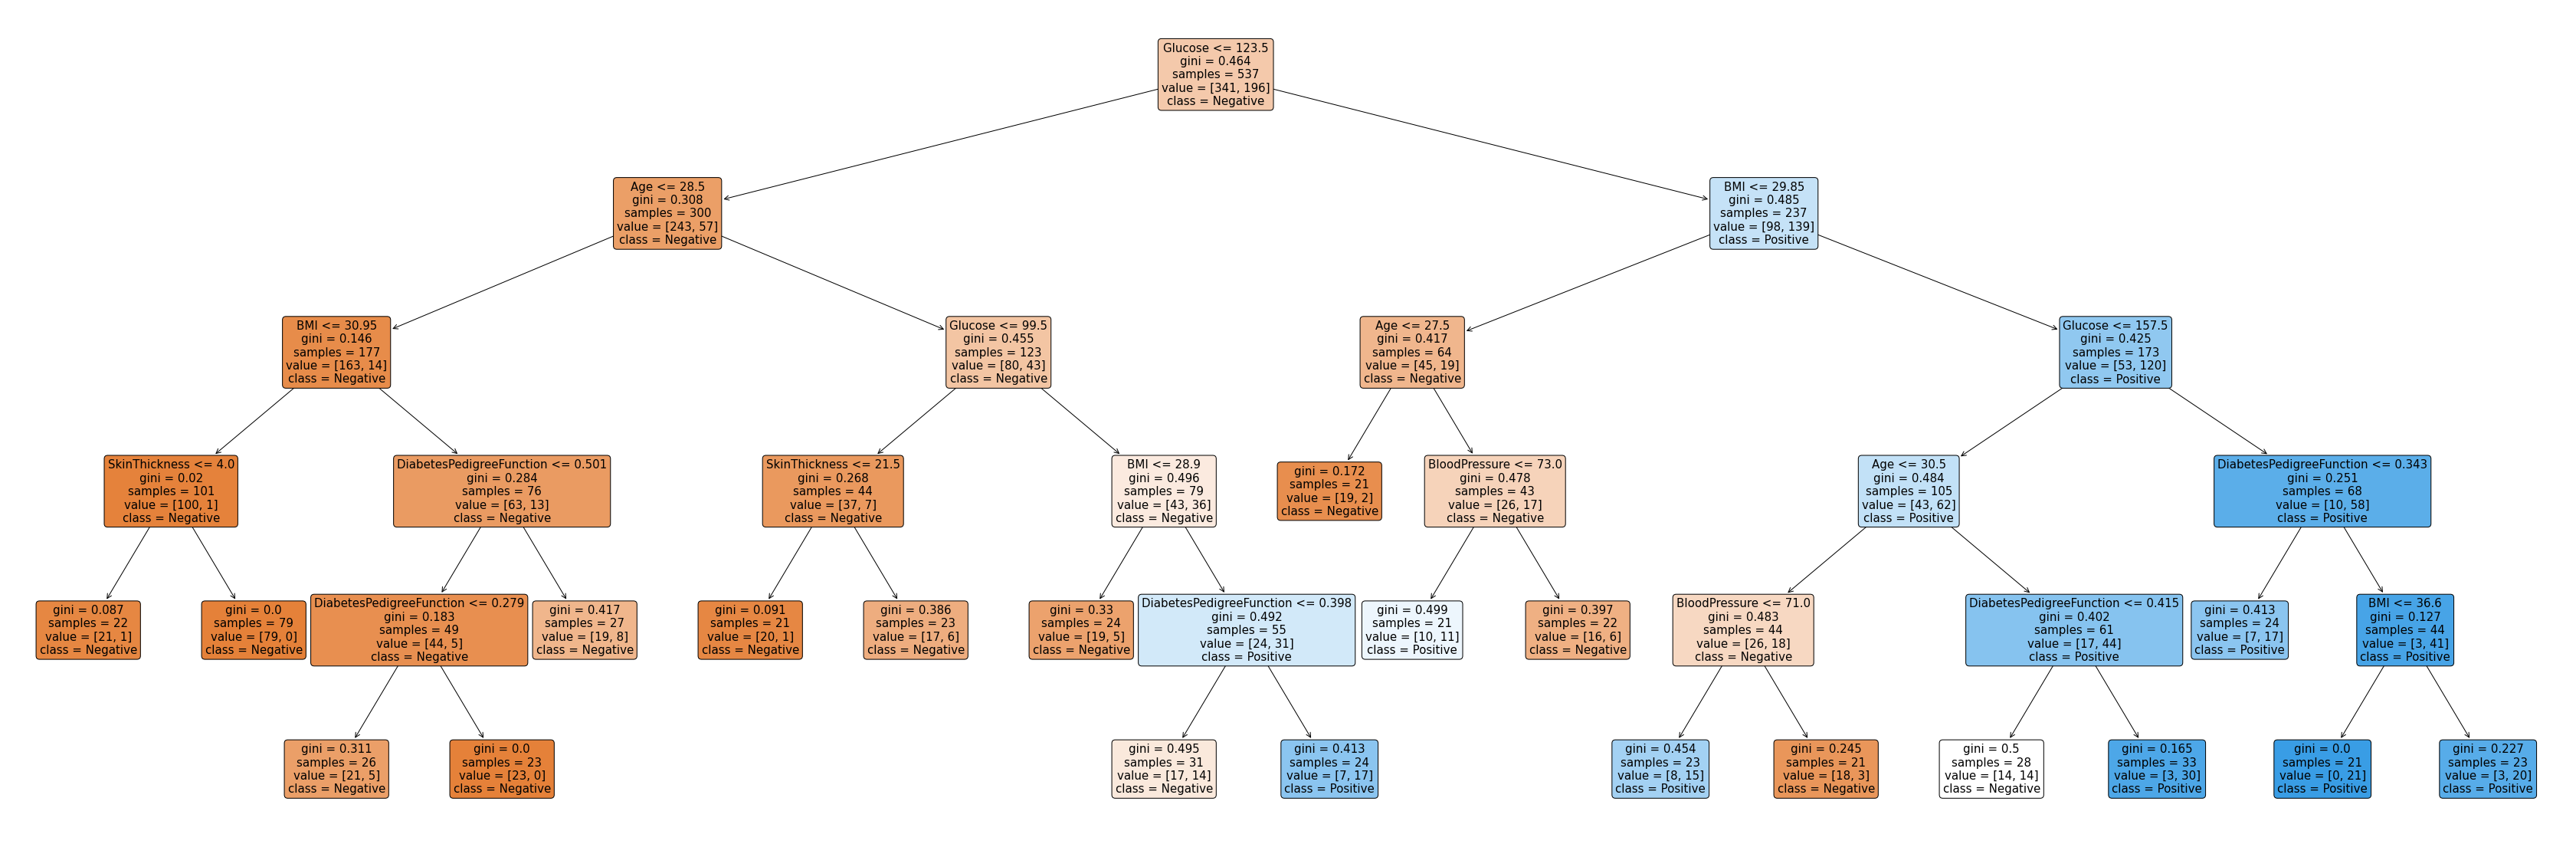

In [115]:
####################
## Your code here ##
####################
from sklearn.tree import plot_tree

plt.figure(figsize = (60,20))
plot_tree(best_tree,
          feature_names = category,
          class_names = ['Negative','Positive'],
          filled=True,
          rounded=True,
          fontsize = 15)
plt.show()

Use the three most important rules.

1. Glucose <= 123.5<br>
2. BMI <= 29.85<br>
3. Age <= 28.5

Interpretation using proportions of classes should be included

전체 데이터는 총 768개의 샘플을 가지고 있습니다 허나 그 중 훈련데이터는 768 * 0.9 * 7/9 = 537개가 되었습니다. 그중 1은 268개인 것으로 보아 **불균형데이터**라는 특징을 가집니다.

우선 처음으로 <br>
if Glucose <= 123.5 -> 300개의 샘플중 243개는 Negative, 57개는 Positive입니다. (243/300, 57/300)<br>
else -> 237개의 샘플 중에 98개는 Negative, 139개는 Positive입니다.(98/237, 139/237)

if Glucose <= 123.5 && Age <= 28.5 -> 177개의 샘플중에 Negative는 163개 Positive는 14개 입니다.(163/177, 14/177)<br>

if Glucose <= 123.5 && Age > 28.5 -> 123개 샘플중에 Negative는 80개 Positive는 43개 입니다.(80/123, 43/123)<br>

if Glucose > 123.5 && BMI <= 29.85 -> 64개 샘플중에 Negative는 45개 Positive는 19개 입니다.(45/64, 19/64)<br>

if Glucose > 123.5 && BMI > 29.85 -> 173개 샘플중에 Negative는 53개 Positive는 120개 입니다.(53/173, 120/173)





